<a href="https://colab.research.google.com/github/zmy2338/Machine-Learning-AWS/blob/main/TRAIN_AWS_P1_Day_7_Happiness_Project_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day #7 Project: 2015 World Happiness Report**
---

### **Description** 
In this project, you will use what you have learned throughout Week 1 about the ML process, Linear Regression, and KNN to analyze the official 2015 World Happiness Report from the United Nations. In particular, you will explore, wrangle, and visualize this data and then model the Happiness Score and Region of countries based on the variables reported in this dataset.

<br>


### **Overview:**

For this project, you are given data collected for the 2015 UN Happiness Report. Everything you need is provided below. But, if you are curious to learn more the [official source can be found here](https://worldhappiness.report/ed/2015/#appendices-and-data). Here is a list of variables for your reference:

* `Country`: The country that the data corresponds to.

* `Region`: The region that this country is classified as belong to.

* `Happiness Score`: A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

* `GDP`: The extent to which GDP contributes to the calculation of the Happiness Score.

* `Social Support`: The extent to which Family contributes to the calculation of the Happiness Score

* `Health Life Expectancy`: The extent to which Life expectancy contributed to the calculation of the Happiness Score

* `Freedom`: The extent to which Freedom contributed to the calculation of the Happiness Score.

* `Corruption Perception`: The extent to which Perception of Corruption contributes to Happiness Score.

* `Generosity`: A model of the national average of response to the question “Have you donated money to a charity in the past month?” on GDP per
capita.

<br>

### **Key questions to answer:**
1. How are these measures, such as Happiness Score or Freedom, determined?

2. What patterns are visually clear in this dataset?

3. Is Linear Regression or KNN better suited to this task of predicting Happiness Score or Region and why?

4. What is the best value of K for any case where you used KNN?

5. What role did feature selection play in the performance of models for both cases?

6. What variables play the largest role in predicting Happiness Score or Region?

<br>

### **Goals:**
**By the end of this project, you will have:**
1. Cleaned, explored, and visualized this dataset.
2. Engineered a new feature and modeled it.
3. Decided when to use Linear Regression or KNN for different tasks.
4. Modeled several different variables and analyzed the results.

<br>

### **Lab Structure**
**Part 1**:  [Data Exploration, Wrangling, and Visualization](#p1)

**Part 2**:  [Predicting Happiness Score](#p2)

> **Part 2.1**: [Using All Numerical Features](#p21)
>
> **Part 2.2**: [Using the 3 Best Numerical Features](#p22)
>
> **Part 2**: [Wrapup](#p2w)
>

**Part 3**: [Predicting Region](#p3)

> **Part 3.1**: [Using All Numerical Features](#p31)
>
> **Part 3.2**: [Using the 2 Best Numerical Features](#p32)
>
> **Part 3**: [Wrapup](#p3w)
>

</br>

### **Cheat Sheets**

* [pandas Commands](https://docs.google.com/document/d/1v-MZCgoZJGRcK-69OOu5fYhm58x2G0JUWyi2H53j8Ls/edit)

* [Feature Engineering and Selection with pandas](https://docs.google.com/document/d/191CH-X6zf4lESuThrdIGH6ovzpHK6nb9NRlqSIl30Ig/edit?usp=sharing)

* [Data Visualizations with matplotlib](https://docs.google.com/document/d/1EC3tTjRRL5ruNjc1n8UmJNGvN82_S-7rx7LLkMvv1Qk/edit?usp=share_link)

* [Linear Regression with sklearn](https://docs.google.com/document/d/1oucIbrFgNu6rYbHqCwqKh_XWM8CXreyrPdtgUJwKyk0/edit?usp=sharing)

* [K-Nearest Neighbors with sklearn](https://docs.google.com/document/d/1fCZ1Gp9eM-Oxs_qb6cOiyPpwkqz155L0GMJl2oxQfXo/edit?usp=share_link)


**Run the code below before continuing:**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#!pip install scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score

<a name="p1"></a>

---
## **Part 1: Data Exploration, Wrangling, and Visualization**
---

In this part, you will load in and explore the dataset for this project. This will involve using functions from pandas as well as reading source material to understand the data that you are working with.

**NOTE**: In most real world situations, you will not do data exploration, wrangling, and visualization separately as we have done in the past. As such, you will simply be asked to perform tasks throughout this section without explicitly distinguishing between exploration, wrangling, and visualization.

<br>

**Run the code below to load in the data.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSUoGLZ90Qr6A5-DmdYD30CIEwMqIAmtWSbdcLgi10u5WoCtCuj_RuSm7wDsFsfcwPGRB6ZZDduCxpO/pub?gid=108149846&single=true&output=csv"

happy_df = pd.read_csv(url)

### **Exercise #1**
---

Using pandas functions, look at the first few rows of data.

#### **Solution**

In [ ]:
happy_df.head()

,Country,region,Happiness Score,GDP,Social_support,Healthy Life_Expectancy,Freedom,corruptionperception,Generosity
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


### **Exercise #2**
---

This data currently has no consistent naming convention for columns, which is very bad practice. So, rename each column to be of the style, `'Column Name'`, where each word is separated by a space (not an underscore, slash, or anything else) and starts uppercase. Furthermore, make sure all words are spelled correctly.

<br>

**Hint**: It may make you life easier to quickly print the current column names here using the `.columns` attribute.

##### **Solution**

In [ ]:
renaming = {'region': 'Region', 'Social_support': 'Social Support', 'Healthy Life_Expectancy': 'Healthy Life Expectancy', 'corruptionperception': 'Corruption Perception'}
happy_df = happy_df.rename(columns = renaming)

happy_df.columns

Index(['Country', 'Region', 'Happiness Score', 'GDP', 'Social Support',
       'Healthy Life Expectancy', 'Freedom', 'Corruption Perception',
       'Generosity'],
      dtype='object')

### **Exercise #3**
---

Drop any duplicate rows.

#### **Solution**

In [ ]:
happy_df.drop_duplicates(inplace = True)

### **Exercise #4**
---

Determine the datatypes and number of non-null values in each column.

#### **Solution**

In [ ]:
happy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  158 non-null    object 
 1   Region                   157 non-null    object 
 2   Happiness Score          157 non-null    float64
 3   GDP                      158 non-null    float64
 4   Social Support           158 non-null    float64
 5   Healthy Life Expectancy  157 non-null    float64
 6   Freedom                  158 non-null    float64
 7   Corruption Perception    158 non-null    float64
 8   Generosity               158 non-null    float64
dtypes: float64(7), object(2)
memory usage: 12.3+ KB


### **Exercise #5**
---

You should have seen from Exercise #4 that there are 3 columns with null values (look back at this Exercise if you did not notice this). We need to either impute by filling with the average or drop the rows with null values.

<br>

Let's deal with these columns by type, specifically:
1. Impute or drop the numerical null values.
2. Impute or drop the object (string) null values.

#### **1. Impute or drop the numerical null values.**

Complete the code below to *drop* the numerical null values. There's an argument for dropping or imputing, but dropping is a safer choice that does not rely on making any assumptions about these variables.

In [ ]:
happy_df = happy_df.dropna(axis = 0, how='any', subset = [# COMPLETE THIS LINE

SyntaxError: ignored

##### **Solution**

In [ ]:
happy_df = happy_df.dropna(axis = 0, how='any', subset = ['Happiness Score', 'Healthy Life Expectancy'])

#### **2. Impute or drop the object (string) null values.**

Complete the code below to *impute* the object (string) null value(s). This is something we can look up, so it's completely reasonable to fill in the missing values manually and not have to sacrifice more data points.

<br>

**NOTE**: You will likely need to use the following three commands to accomplish this:

1. `happy_df[happy_df['column name'].isnull()]`: Print the specific data point(s) with a null value for `'column name'`.
2. `happy_df['column name'].unique()`: Print the possible values that we could use to fill in the null value found above.
3. `happy_df.loc[happy_df['column name'].isnull(), 'column name'] = 'non-null value'`: Fill in the null value with a new value. This should be the best option from the list of unique values found above.

##### **Solution**

In [ ]:
happy_df[happy_df['Region'].isnull()]

,Country,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
64,Libya,NaN,5.754,1.13145,1.11862,0.7038,0.41668,0.11023,0.18295


In [ ]:
happy_df['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       nan, 'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [ ]:
happy_df.loc[happy_df['Region'].isnull(), 'Region'] = 'Middle East and Northern Africa'

### **Exercise #6**
---

Now that the data should be clean, take some time to understand the variables in this dataset, by looking at the [official statistical appendix/codebook here](https://s3.amazonaws.com/happiness-report/2015/StatisticalAppendixWHR3-April-16-2015.pdf) and answering the multiple choice questions below. You will only need to refer to the first 2.5 pages of information, until they start mentioning the "expanded data set". You do not need to read anything after this.

<br>

**1. Which of the following best describes the “happiness score”?**

**a.** We can also call this measure the “life ladder”.

**b.** We can also call this measure the “objective well-being”.

**c.** This is a measure of how many ladders people own in a country on average. The more ladders, the happier the people.

**d.** Respondents were asked how happy they were on a scale of 1 - 10.

<br>

**2. How was “social support” measured?**

**a.** This represents the average of responses on a scale of 1 - 10.

**b.** This was measured differently for each country.

**c**. Respondents were asked, “If you were in trouble, would you have support?”

**d.** Respondents were asked, “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?”

<br>

**3. How was “freedom” measured?**

**a.** This represents the average of responses on a scale of 1 - 10.

**b.** This was measured differently for each country.

**c**. Respondents were asked, “Are you satisfied or dissatisfied with your freedom to choose what you do with your life?”

**d.** Respondents were asked, “How free are you?”

In [ ]:
# ENTER YOUR ANSWER TO 1 HERE

In [ ]:
# ENTER YOUR ANSWER TO 2 HERE

In [ ]:
# ENTER YOUR ANSWER TO 3 HERE

#### **Solution**

1. a
2. d
3. c

### **Exercise #7**
---

Using pandas functions, determine the mean (average) and std (spread/standard deviation) of the numerical variables.

#### **Solution**

In [ ]:
happy_df.describe()

,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.360750,0.844602,0.988929,0.628669,0.428004,0.143960,0.236874
std,1.142177,0.403282,0.273001,0.247780,0.150628,0.120321,0.127258
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.517750,0.539453,0.854692,0.437897,0.326865,0.062105,0.148800
50%,5.203000,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,6.193250,1.155523,1.210735,0.809837,0.547057,0.179565,0.307547
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


### **Exercise #8**
---

Using pandas functions, determine all the regions that were included in this dataset.

#### **Solution**

In [ ]:
happy_df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

### **Exercise #9**
---

Complete the code below to create a new feature called `Region Encoded` that encodes the regions into numerical values.

In [ ]:
region_list = # COMPLETE THIS LINE
region_map = {region_list[i]: i for i in range(len(region_list))}

happy_df['Region Encoded'] = # COMPLETE THIS LINE

happy_df.head()

#### **Solution**

In [ ]:
region_list = happy_df["Region"].unique()
region_map = {region_list[i]: i for i in range(len(region_list))}

happy_df['Region Encoded'] = happy_df['Region'].map(region_map)

happy_df.head()

,Country,Region,Happiness Score,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity,Region Encoded
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,1


### **Exercise #10**
---

Let's visualize some of the data and see if we can discover some relationships. Specifically, create bar graphs of `Happiness Score` for the countries in several different regions: `"Middle East and Northern Africa"`, `"Southern Asia"`, and `"North America"`.

<br>

**NOTE: Some of the code has already been provided for the first example to help you get started.**

#### **Middle East and Northern Africa**

In [ ]:
x = happy_df[happy_df["Region"] == # COMPLETE THIS LINE
y = # COMPLETE THIS LINE

plt.# COMPLETE THIS LINE

plt.title(# COMPLETE THIS LINE
plt.xlabel(# COMPLETE THIS LINE
plt.ylabel(# COMPLETE THIS LINE
plt.xticks(rotation = 90)

plt.show()

##### **Solution**

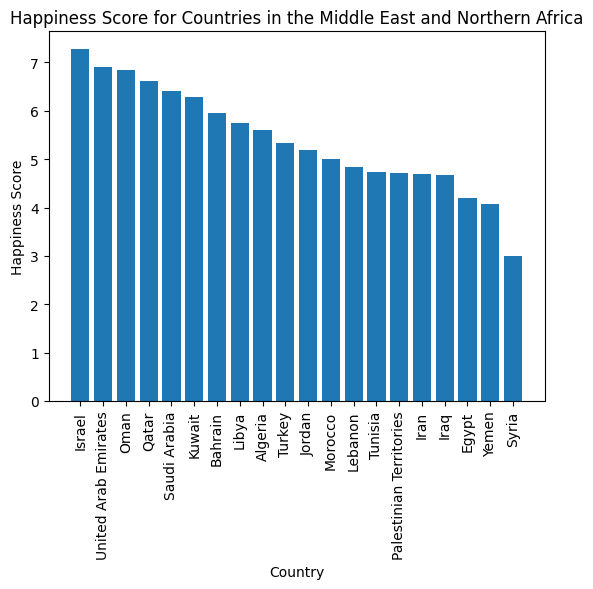

In [ ]:
x = happy_df[happy_df["Region"] == "Middle East and Northern Africa"]["Country"]
y = happy_df[happy_df["Region"] == "Middle East and Northern Africa"]["Happiness Score"]

plt.bar(x, y)

plt.title("Happiness Score for Countries in the Middle East and Northern Africa")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation = 90)

plt.show()

#### **Southern Asia**

##### **Solution**

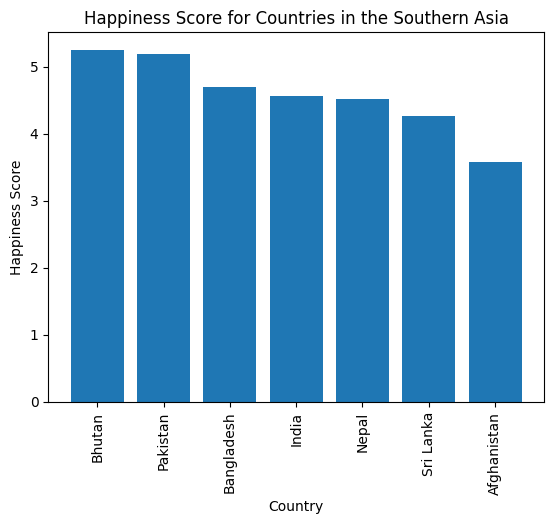

In [ ]:
x = happy_df[happy_df["Region"] == "Southern Asia"]["Country"]
y = happy_df[happy_df["Region"] == "Southern Asia"]["Happiness Score"]

plt.bar(x, y)

plt.title("Happiness Score for Countries in the Southern Asia")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation = 90)

plt.show()

#### **North America**

##### **Solution**

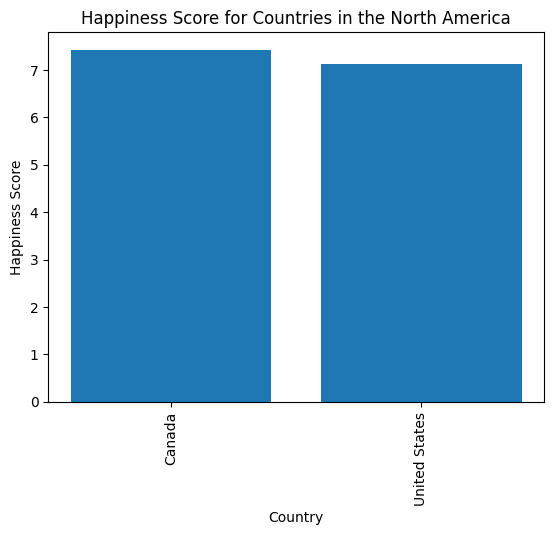

In [ ]:
x = happy_df[happy_df["Region"] == "North America"]["Country"]
y = happy_df[happy_df["Region"] == "North America"]["Happiness Score"]

plt.bar(x, y)

plt.title("Happiness Score for Countries in the North America")
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.xticks(rotation = 90)

plt.show()

### **Exercise #11**
---

Now, create scatter plots of `Happiness Score` on the y axis versus several different numerical variables on the x axis: `Social Support`, `Freedom`, and `GDP`.

#### **Happiness Score vs. Social Support**

##### **Solution**

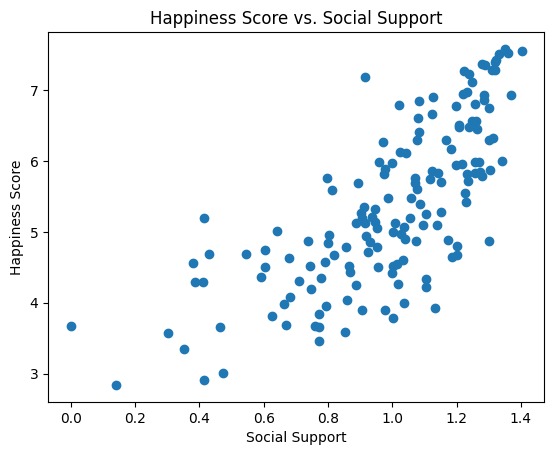

In [ ]:
plt.scatter(happy_df["Social Support"], happy_df["Happiness Score"])

plt.title("Happiness Score vs. Social Support")
plt.xlabel("Social Support")
plt.ylabel("Happiness Score")

plt.show()

#### **Happiness Score vs. Freedom**

##### **Solution**

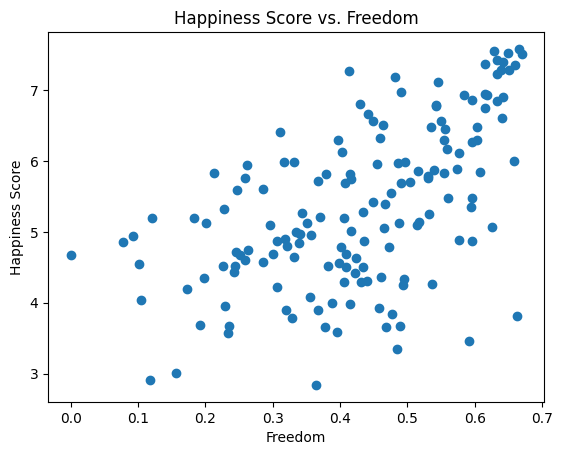

In [ ]:
plt.scatter(happy_df["Freedom"], happy_df["Happiness Score"])

plt.title("Happiness Score vs. Freedom")
plt.xlabel("Freedom")
plt.ylabel("Happiness Score")

plt.show()

#### **Happiness Score vs. GDP**

##### **Solution**

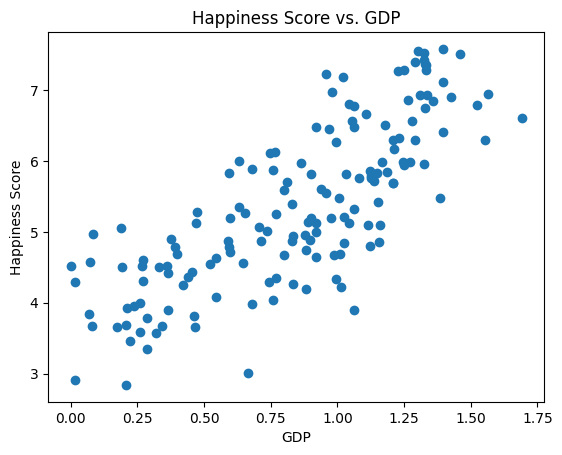

In [ ]:
plt.scatter(happy_df["GDP"], happy_df["Happiness Score"])

plt.title("Happiness Score vs. GDP")
plt.xlabel("GDP")
plt.ylabel("Happiness Score")

plt.show()

<a name="p2"></a>

---
## **Part 2: Predicting Happiness Score**
---

Now you will create, evaluate, and train an ML model to predict the happiness score of a country based on the provided numerical features. It is up to you to determine if you should be using Linear Regression or KNN here. 

<br>

You will do this two times as follows:

**Part 2.1**: Using All Numerical Features

**Part 2.2**: Using the 3 Best Numerical Features

<br>

Both times, you will follow the 8 step process for implementing ML models that we have learned this last week:

1. Load in the data (**this has already been done in Part 1**)
2. Decide independent and dependent variables
3. Split the data into training and testing datasets
4. Import a ML algorithm
5. Set the model’s parameters
6. Fit the model on the training set and test the model on the test dataset. Draw a visualization (if applicable to the model)
7. Evaluate the model’s performance
8. Apply your model

<a name="p21"></a>

---
### **Part 2.1: Using All Numerical Features**
---

#### **Step #2: Decide independent and dependent variables**
---

Complete the code below to decide the independent and dependent variables.

<br>

**NOTE**: The dependent variable (label) for all of Part 2 is `Happiness Score`. Using one of several pandas functions, you can determine the numerical features available and use them all as the independent variables.

In [ ]:
happy_df.# COMPLETE THIS LINE

SyntaxError: ignored

In [ ]:
x = # COMPLETE THIS LINE
y = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
happy_df.dtypes

Country                     object
Region                      object
Happiness Score            float64
GDP                        float64
Social Support             float64
Healthy Life Expectancy    float64
Freedom                    float64
Corruption Perception      float64
Generosity                 float64
Region Encoded               int64
dtype: object

In [ ]:
x = happy_df.drop(columns = ['Country', 'Region', 'Happiness Score'], axis = 1)
y = happy_df['Happiness Score']

#### **Step #3: Split data into training and testing data**
---

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

SyntaxError: ignored

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### **Step #4: Import the algorithm**
---

##### **Solution**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5:  Initialize the model and set hyperparameters**
---

Specifically,
* For Linear Regression, there are no hyperparameters to set.
* For KNN, choose a reasonable value for `n_neighbors`. You are encouraged to try Steps #5 - 7 for several values and picking the model with the highest performance.

In [ ]:
model_1 = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
model_1 = LinearRegression()

#### **Step #6: Fit your model and make a prediction. Create a visualization if applicable**
---

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_1.# COMPLETE THIS LINE TO TRAIN
predictions = model_1.# COMPLETE THIS LINE TO PREDICT

SyntaxError: ignored

###### **Solution**

In [ ]:
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

##### **2. Visualize the results.**

The code is provided for both linear regression and KNN, but it is up to you to decide which one makes the most sense here.

###### **Linear Regression Visualization**

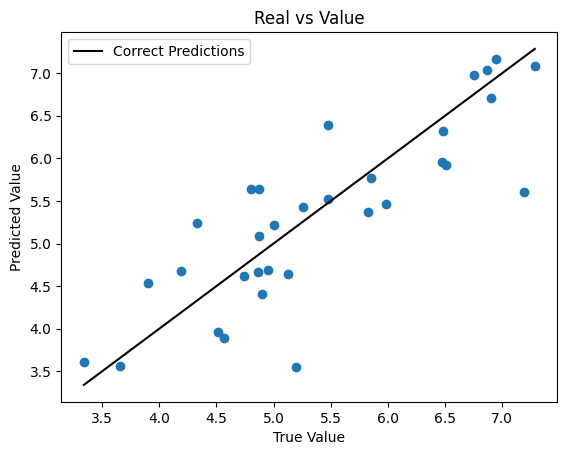

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

###### **KNN Visualization**

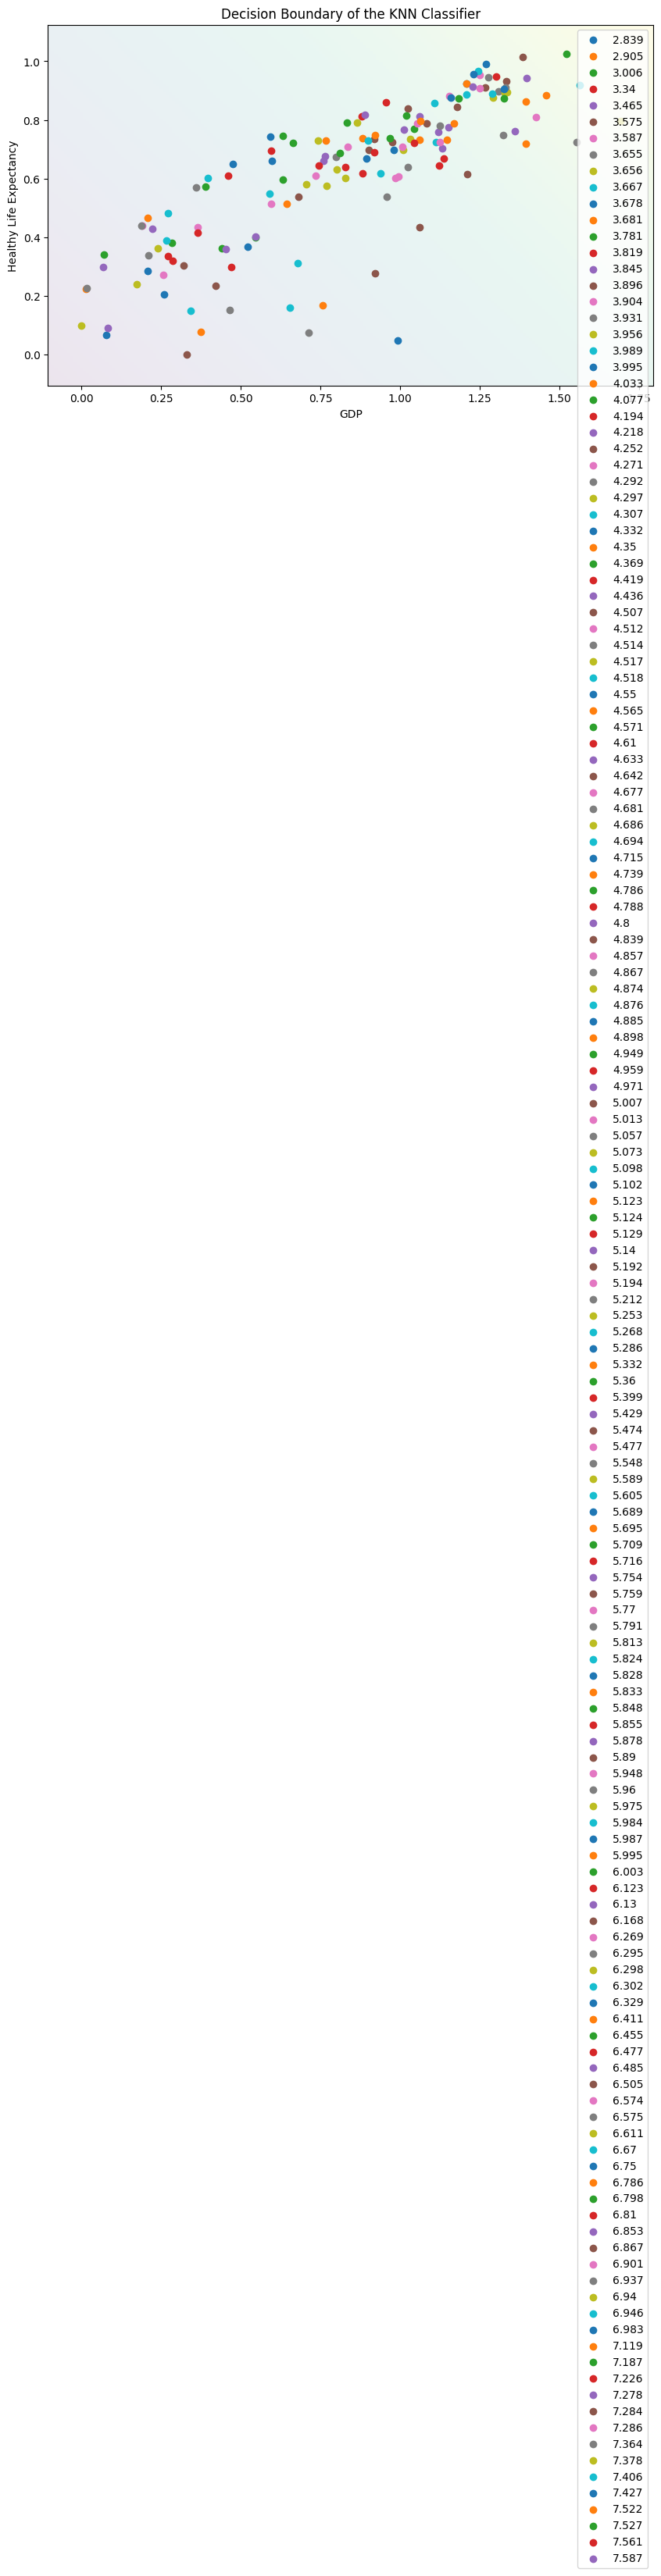

In [ ]:
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))

means = x.mean()
inputs = [[means[0], x, means[2], y, means[4], means[5], means[6]] for (x, y) in np.c_[xx.ravel(), yy.ravel()]]
z = model_1.predict(inputs)
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Happiness Score'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

###### **Solution**


It should be linear regression, so this is the resulting plot.

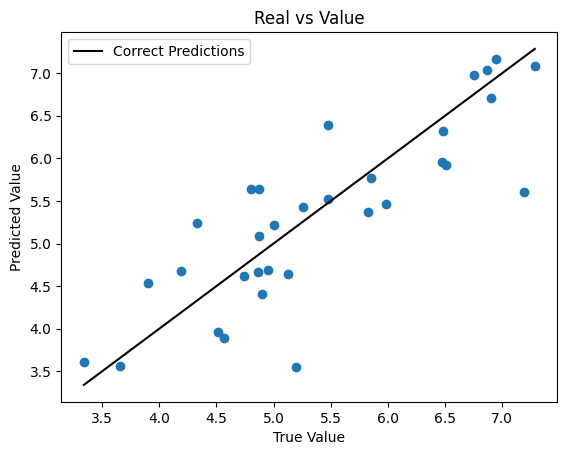

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

#### **Step #7: Evaluate the model’s performance**
---

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

<br>

If you used KNN, you should try several values for Steps #5 - 7 and pick the model that performs highest according to these metrics.

##### **Solution**

In [ ]:
print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.6725966134860057
MSE: 0.3646316886171512
MAE: 0.4652770191515724


#### **Step #8: Use the model**
---

Specifically,

1. Predict the happiness score of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the happiness score of these countries that reported the following results for their numerical measures:**

**Country 1**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 0

<br>

**Country 2**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 9

<br>

**Country 3**

* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 0.1
* `Generosity`: 0.9
* `Region Encoded`: 4

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

print(model_1.predict(# COMPLETE THIS LINE

In [ ]:
# COUNTRY 2
# COMPLETE THIS CODE

In [ ]:
# COUNTRY 3
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[0.9, 0.4, 0.8, 0.4, 0.2, 0.09, 0]], columns = X_test.columns)

print(model_1.predict(new_country))

[4.82783728]


In [ ]:
# COUNTRY 2
new_country = pd.DataFrame([[0.9, 0.4, 0.8, 0.4, 0.2, 0.09, 9]], columns = X_test.columns)

print(model_1.predict(new_country))

[4.26447233]


In [ ]:
# COUNTRY 3
new_country = pd.DataFrame([[1.1, 0.9, 1.01, 0.9, 0.1, 0.9, 4]], columns = X_test.columns)

print(model_1.predict(new_country))

[6.52831249]


##### **2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.**

###### **Solution**

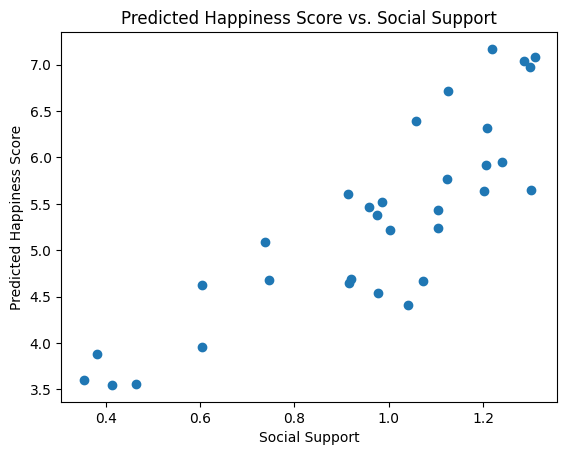

In [ ]:
plt.scatter(X_test["Social Support"], predictions)

plt.title("Predicted Happiness Score vs. Social Support")
plt.xlabel("Social Support")
plt.ylabel("Predicted Happiness Score")

plt.show()

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.# COMPLETE THIS LINE
intercept = model_1.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity,Region Encoded
0,0.833614,1.524989,0.442303,1.387252,0.64792,0.370277,-0.062596


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Happiness Score
0,True


###### **Solution**

In [ ]:
coefficients = model_1.coef_
intercept = model_1.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,GDP,Social Support,Healthy Life Expectancy,Freedom,Corruption Perception,Generosity,Region Encoded
0,0.833614,1.524989,0.442303,1.387252,0.64792,0.370277,-0.062596


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Happiness Score
0,2.395936


<a name="p22"></a>

---
### **Part 2.2: Using the 3 Best Numerical Features**
---

#### **Step #2: Decide independent and dependent variables**
---

Redo Step #2 using `SelectKBest(...)` on the `x` and `y` data from Part 2.1 to select the top 3 features.

<br>

**NOTE**: `y` will be the same in all of Part 2.

In [ ]:
# Select 3 best features
feature_selector = SelectKBest(# COMPLETE THIS LINE
feature_selector.fit_transform(# COMPLETE THIS LINE
best_features = happy_df[feature_selector.get_feature_names_out()]

# Look at resulting DataFrame
best_features.head()

SyntaxError: ignored

##### **Solution**

In [ ]:
# Select 3 best features
feature_selector = SelectKBest(k = 3)
feature_selector.fit_transform(x, y)
best_features = happy_df[feature_selector.get_feature_names_out()]

# Look at resulting DataFrame
best_features.head()

,GDP,Healthy Life Expectancy,Corruption Perception
0,1.39651,0.94143,0.41978
1,1.30232,0.94784,0.14145
2,1.32548,0.87464,0.48357
3,1.45900,0.88521,0.36503
4,1.32629,0.90563,0.32957


#### **Step #3: Split data into training and testing data**
---

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(best_features, # COMPLETE THIS LINE

SyntaxError: ignored

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size = 0.2, random_state = 42)

#### **Step #4: Import the algorithm**
---

##### **Solution**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5:  Initialize the model and set hyperparameters**
---

Specifically,
* For Linear Regression, there are no hyperparameters to set.
* For KNN, choose a reasonable value for `n_neighbors`. You are encouraged to try Steps #5 - 7 for several values and picking the model with the highest performance.

In [ ]:
model_2 = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
model_2 = LinearRegression()

#### **Step #6: Fit your model and make a prediction. Create a visualization if applicable**
---

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_2.# COMPLETE THIS LINE TO TRAIN
predictions = model_2.# COMPLETE THIS LINE TO PREDICT

###### **Solution**

In [ ]:
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

##### **2. Visualize the results.**

The code is provided for both linear regression and KNN, but it is up to you to decide which one makes the most sense here.

###### **Linear Regression Visualization**

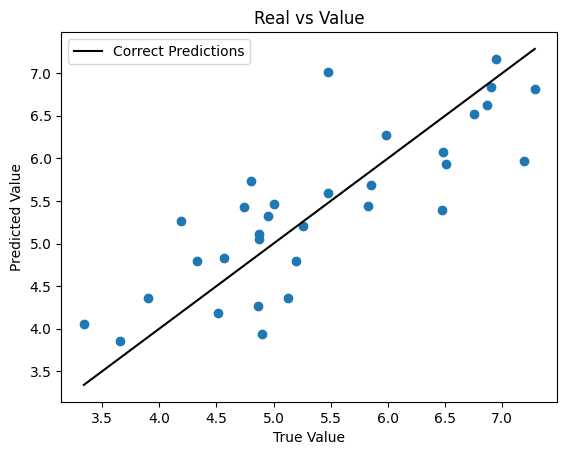

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

###### **KNN Visualization**

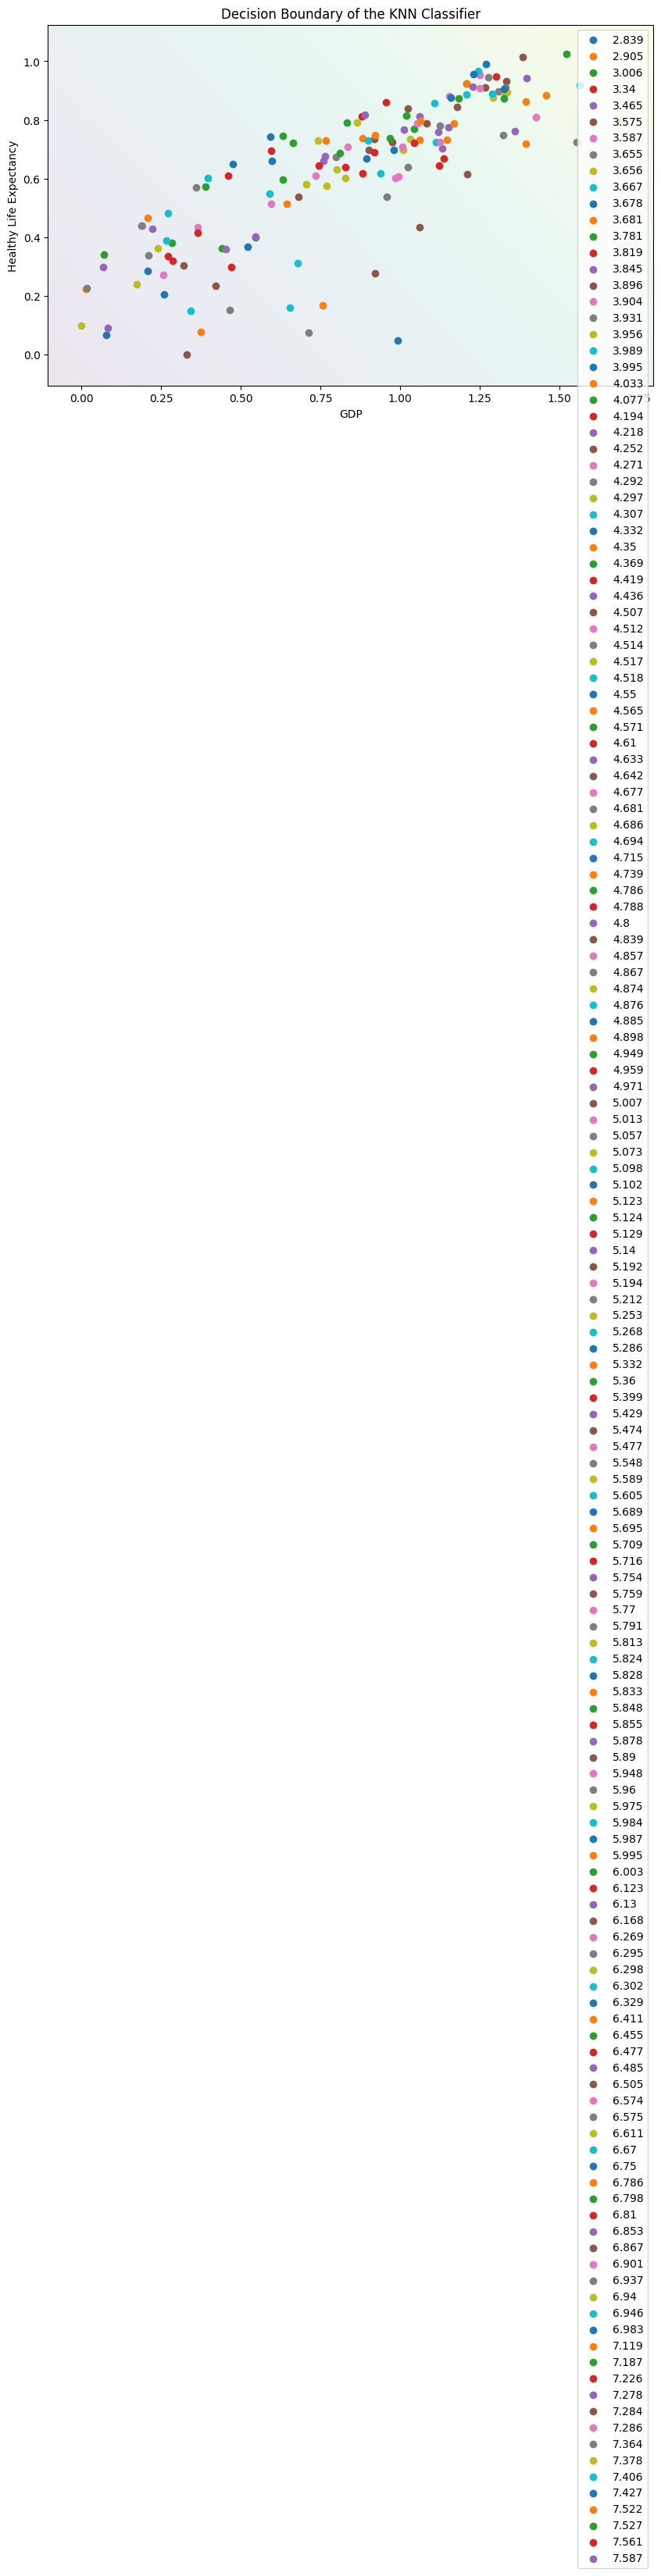

In [ ]:
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))
means = x.mean()
inputs = [[x, y, means[2]] for (x, y) in np.c_[xx.ravel(), yy.ravel()]]
z = model_2.predict(inputs)
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Happiness Score'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

###### **Solution**


It should be linear regression, so this is the resulting plot.

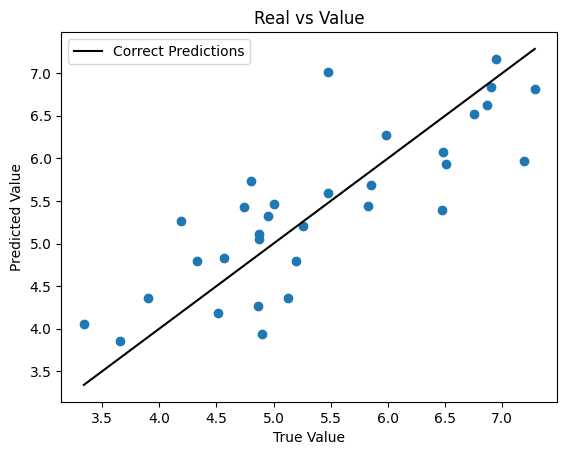

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

#### **Step #7: Evaluate the model’s performance**
---

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

<br>

If you used KNN, you should try several values for Steps #5 - 7 and pick the model that performs highest according to these metrics.

##### **Solution**

In [ ]:
print("R2: " + str(r2_score(y_test, predictions)))
print("MSE: " + str(mean_squared_error(y_test, predictions)))
print("MAE: " + str(mean_absolute_error(y_test, predictions)))

R2: 0.6553380105076845
MSE: 0.3838527284914264
MAE: 0.5040967754442508


#### **Step #8: Use the model**
---

Specifically,

1. Predict the happiness score of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. Look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the happiness score of these countries that reported the following results for their numerical measures:**

**Country 1**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 0

<br>

**Country 2**

* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09
* `Region Encoded`: 9

<br>

**Country 3**

* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 0.1
* `Generosity`: 0.9
* `Region Encoded`: 4


<br>

**NOTE**: Since we selected only the top 3 features, you will need to only provide these 3 values for each prediction. Looking at the columns in the X data could be helpful here.

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

print(linear_model_2.predict(# COMPLETE THIS LINE

In [ ]:
# COUNTRY 2
# COMPLETE THIS CODE

In [ ]:
# COUNTRY 3
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[0.9, 0.8, 0.2]], columns = X_test.columns)

print(linear_model_2.predict(new_country))

NameError: ignored

In [ ]:
# COUNTRY 2
new_country = pd.DataFrame([[0.9, 0.8, 0.2]], columns = X_test.columns)

print(linear_model_2.predict(new_country))

In [ ]:
# COUNTRY 3
new_country = pd.DataFrame([[1.1, 1.01, 0.1]], columns = X_test.columns)

print(linear_model_2.predict(new_country))

##### **2. Visualize the modeled relationship between `Happinesss Score` and one of the 3 features chosen to see if a qualitative relationship can be inferred.**

###### **Solution**

In [ ]:
plt.scatter(X_test["GDP"], predictions)

plt.title("Predicted Happiness Score vs. GDP")
plt.xlabel("GDP")
plt.ylabel("Predicted Happiness Score")

plt.show()

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_2.# COMPLETE THIS LINE
intercept = model_2.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

In [ ]:
print("\nIntercept:")
intercept.head()

###### **Solution**

In [ ]:
coefficients = model_2.coef_
intercept = model_2.intercept_

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

In [ ]:
print("\nIntercept:")
intercept.head()

<a name="p2w"></a>

---
### **Part 2: Wrapup**
---

Now that you have trained several models to accomplish this task, answer the following questions:

1. Is Linear Regression or KNN better suited to this task? Why?
2. Were there any hyperparameters you need to tune and, if so, what were the best values you found?
3. Did selecting a smaller number of features improve or decrease the performance of your model?
4. What 3 variables seem to play the largest role in determining `Happiness Score` based on your work in this part?

#### **Solution**

1. The label, `Happiness Score`, is a continuous number and so are the features (largely). So this is a regression problem through and through. It is not clear what the classes would be that we'd be classifying with KNN and, in fact, sklearn would likely not let you even train a KNN model due to this reason!

2. There are no hyperparameters with linear regression, so nothing more to say here.

3. Selecting a smaller number of features hurt the model's performance. Linear Regression does not suffer from the curse of dimensionality nearly as much as other models (such as KNN) since it can effectively decrease the coefficients to 0 for any unnecessary features. So, unless you're dealing with an *enormous* number of features relative to the size of your dataset, including all features tends to be the best practice.

4. The main factors to consider here are the coefficients that the model(s) learned and which features seemed best according to `SelectKBest(...)`. In particular, the coefficients of the first model seemed to suggest that `Social Support` is the most important feature followed by `Freedom` and then `GDP`. `SelectKBest(...)` seemed to prefer `GDP`, `Healthy Life Expectancy`, and `Corruption Perception`. Given that selecting fewer parameters resulted in a worse model, it is probably best to rely on the first model's coefficients.

<a name="p3"></a>

---
## **Part 3: Predicting Region**
---

Now you will create, evaluate, and train an ML model to predict the region of a country based on the provided numerical features. It is up to you to determine if you should be using Linear Regression or KNN here.

<br>

You will do this two times as follows:

**Part 3.1**: Using All Numerical Features

**Part 3.2**: Using the 3 Best Numerical Features

<br>

Both times, you will follow the 8 step process for implementing ML models that we have learned this last week:

1. Load in the data (**this has already been done in Part 1**)
2. Decide independent and dependent variables
3. Split the data into training and testing datasets
4. Import a ML algorithm
5. Set the model’s parameters
6. Fit the model on the training set and test the model on the test dataset. Draw a visualization (if applicable to the model)
7. Evaluate the model’s performance
8. Apply your model

<a name="p31"></a>

---
### **Part 3.1: Using All Numerical Features**
---

#### **Step #2: Decide independent and dependent variables**
---

Complete the code below to decide the independent and dependent variables.

<br>

**NOTE**: The dependent variable (label) for all of Part 3 is `Region Encoded`. Using one of several pandas functions, you can determine the numerical features available and use them all as the independent variables.

In [ ]:
happy_df.# COMPLETE THIS LINE

In [ ]:
x = # COMPLETE THIS LINE
y = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
happy_df.dtypes

Country                     object
Region                      object
Happiness Score            float64
GDP                        float64
Social Support             float64
Healthy Life Expectancy    float64
Freedom                    float64
Corruption Perception      float64
Generosity                 float64
Region Encoded               int64
dtype: object

In [ ]:
x = happy_df.drop(columns = ['Country', 'Region', 'Region Encoded'], axis = 1)
y = happy_df['Region Encoded']

#### **Step #3: Split data into training and testing data**
---

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS LINE

SyntaxError: ignored

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#### **Step #4: Import the algorithm**
---

##### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5:  Initialize the model and set hyperparameters**
---

Specifically,
* For Linear Regression, there are no hyperparameters to set.
* For KNN, choose a reasonable value for `n_neighbors`. You are encouraged to try Steps #5 - 7 for several values and picking the model with the highest performance.

In [ ]:
model_1 = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
model_1 = KNeighborsClassifier(n_neighbors = 11)

#### **Step #6: Fit your model and make a prediction. Create a visualization if applicable**
---

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_1.# COMPLETE THIS LINE TO TRAIN
predictions = model_1.# COMPLETE THIS LINE TO PREDICT

###### **Solution**

In [ ]:
model_1.fit(X_train, y_train)
predictions = model_1.predict(X_test)

##### **2. Visualize the results.**

The code is provided for both linear regression and KNN, but it is up to you to decide which one makes the most sense here.

###### **Linear Regression Visualization**

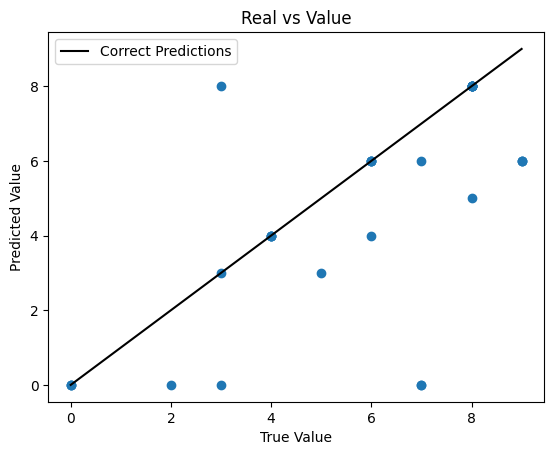

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

###### **KNN Visualization**

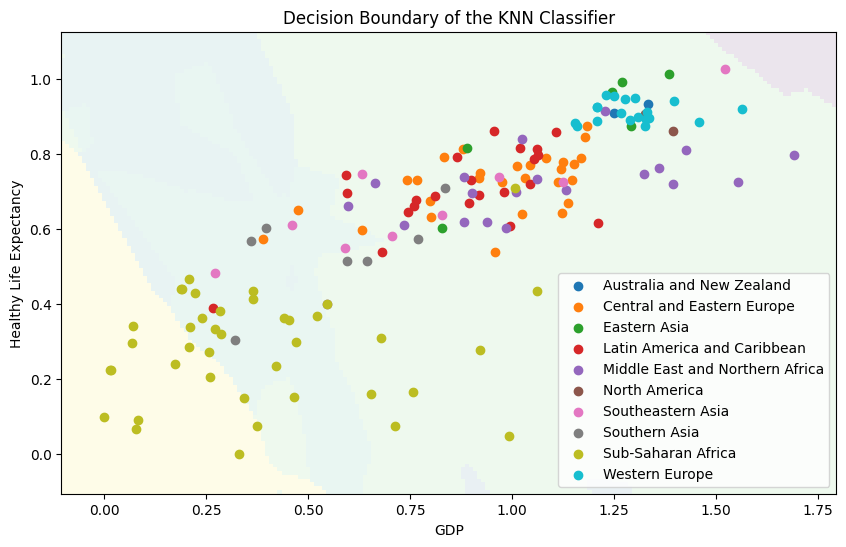

In [ ]:
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))
means = x.mean()
inputs = [[means[0], x, means[2], y, means[4], means[5], means[6]] for (x, y) in np.c_[xx.ravel(), yy.ravel()]]
z = model_1.predict(inputs)
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Region'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

###### **Solution**


It should be KNN, so this is the resulting plot.

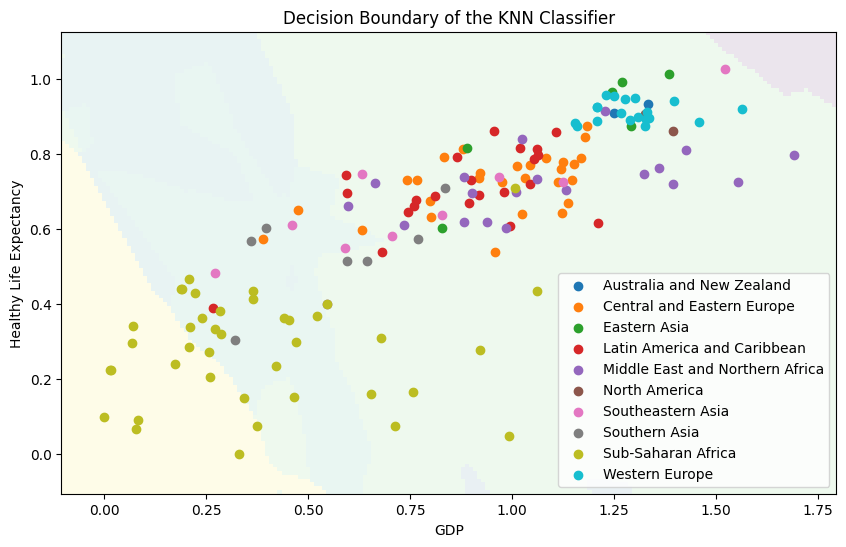

In [ ]:
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))
means = x.mean()
inputs = [[means[0], x, means[2], y, means[4], means[5], means[6]] for (x, y) in np.c_[xx.ravel(), yy.ravel()]]
z = model_1.predict(inputs)
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Region'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

#### **Step #7: Evaluate the model’s performance**
---

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

<br>

If you used KNN, you should try several values for Steps #5 - 7 and pick the model that performs highest according to these metrics.

##### **Solution**

In [ ]:
print("Accuracy Score: " + str(accuracy_score(y_test, predictions)))

Accuracy Score: 0.625


#### **Step #8: Use the model**
---

Specifically,

1. Predict the region of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the region of these countries that reported the following results for their numerical measures:**

**Country 1**

* `Happiness Score`: 2.3
* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09

<br>

**Country 2**

* `Happiness Score`: 7.8
* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09

<br>

**Country 3**

* `Happiness Score`: 4.5
* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 1.1
* `Generosity`: 0.9

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

region = model_1.predict(# COMPLETE THIS LINE
print(happy_df['Region'].unique()[region[0]])

In [ ]:
# COUNTRY 2
# COMPLETE THIS CODE

In [ ]:
# COUNTRY 3
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[2.3, 0.9, 0.4, 0.8, 0.4, 0.2, 0.09]], columns = X_test.columns)

region = model_1.predict(new_country)
print(happy_df['Region'].unique()[region[0]])

Sub-Saharan Africa


In [ ]:
# COUNTRY 2
new_country = pd.DataFrame([[7.8, 0.9, 0.4, 0.8, 0.4, 0.2, 0.09]], columns = X_test.columns)

region = model_1.predict(new_country)
print(happy_df['Region'].unique()[region[0]])

Western Europe


In [ ]:
# COUNTRY 3
new_country = pd.DataFrame([[4.5, 1.1, 0.9, 1.01, 0.9, 1.1, 0.9]], columns = X_test.columns)

region = model_1.predict(new_country)
print(happy_df['Region'].unique()[region[0]])

Central and Eastern Europe


##### **2. Visualize the modeled relationship between `Region` and `Healthy Life Expectancy` to see if a qualitative relationship can be inferred.**

In [ ]:
# COMPLETE THIS CODE

plt.yticks(ticks = range(10), labels = happy_df['Region'].unique())

plt.show()

###### **Solution**

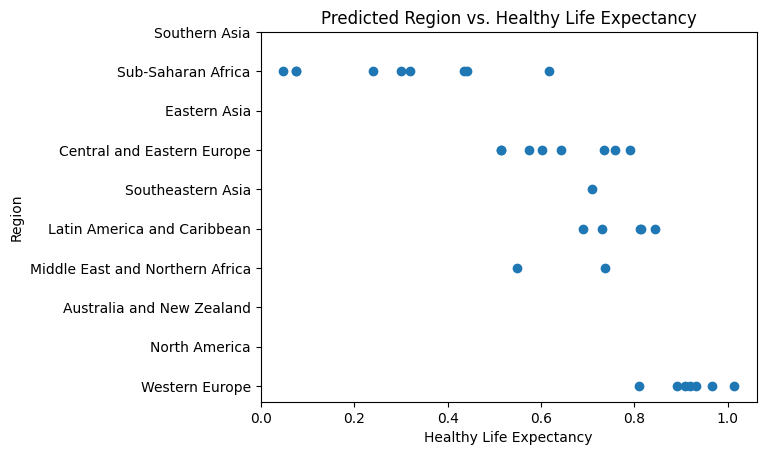

In [ ]:
plt.scatter(X_test["Healthy Life Expectancy"], predictions)

plt.title("Predicted Region vs. Healthy Life Expectancy")
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Region")

plt.yticks(ticks = range(10), labels = happy_df['Region'].unique())

plt.show()

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.# COMPLETE THIS LINE
intercept = model_1.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

Coefficients:


,GDP,Healthy Life Expectancy,Corruption Perception
0,1.444774,1.294464,1.640987


In [ ]:
print("\nIntercept:")
intercept.head()


Intercept:


,Happiness Score
0,3.091989


###### **Solution**

This is a classification task, so this question is irrelevant.

<a name="p32"></a>

---
### **Part 3.2: Using the 2 Best Numerical Features**
---

#### **Step #2: Decide independent and dependent variables**
---

Redo Step #2 using `SelectKBest(...)` on the `x` and `y` data from Part 3.1 to select the top 2 features.

<br>

**NOTE**: `y` will be the same in all of Part 3.

In [ ]:
# Select 3 best features
feature_selector = SelectKBest(# COMPLETE THIS LINE
feature_selector.fit_transform(# COMPLETE THIS LINE
best_features = happy_df[feature_selector.get_feature_names_out()]

# Look at resulting DataFrame
best_features.head()

##### **Solution**

In [ ]:
# Select 3 best features
feature_selector = SelectKBest(k = 2)
feature_selector.fit_transform(x, y)
best_features = happy_df[feature_selector.get_feature_names_out()]

# Look at resulting DataFrame
best_features.head()

,GDP,Healthy Life Expectancy
0,1.39651,0.94143
1,1.30232,0.94784
2,1.32548,0.87464
3,1.45900,0.88521
4,1.32629,0.90563


#### **Step #3: Split data into training and testing data**
---

Complete the code below to split the data, using 80% for training and 20% for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(best_features, # COMPLETE THIS LINE

##### **Solution**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(best_features, y, test_size = 0.2, random_state = 42)

#### **Step #4: Import the algorithm**
---

##### **Solution**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step #5:  Initialize the model and set hyperparameters**
---

Specifically,
* For Linear Regression, there are no hyperparameters to set.
* For KNN, choose a reasonable value for `n_neighbors`. You are encouraged to try Steps #5 - 7 for several values and picking the model with the highest performance.

In [ ]:
model_2 = # COMPLETE THIS LINE

##### **Solution**

In [ ]:
model_2 = KNeighborsClassifier(n_neighbors = 5)

#### **Step #6: Fit your model and make a prediction. Create a visualization if applicable**
---

Specifically,

1. Fit the model to the training data and make predictions on the test data.
2. Visualize the results.

##### **1. Fit the model to the training data.**

In [ ]:
model_2.# COMPLETE THIS LINE TO TRAIN
predictions = model_2.# COMPLETE THIS LINE TO PREDICT

###### **Solution**

In [ ]:
model_2.fit(X_train, y_train)
predictions = model_2.predict(X_test)

##### **2. Visualize the results.**

The code is provided for both linear regression and KNN, but it is up to you to decide which one makes the most sense here.

###### **Linear Regression Visualization**

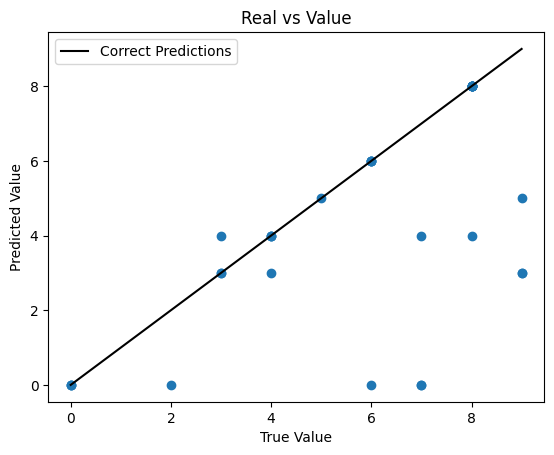

In [ ]:
# Visualize comparison of predictions vs. actual values
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label='Correct Predictions')


plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Real vs Value')
plt.legend()

plt.show()

###### **KNN Visualization**

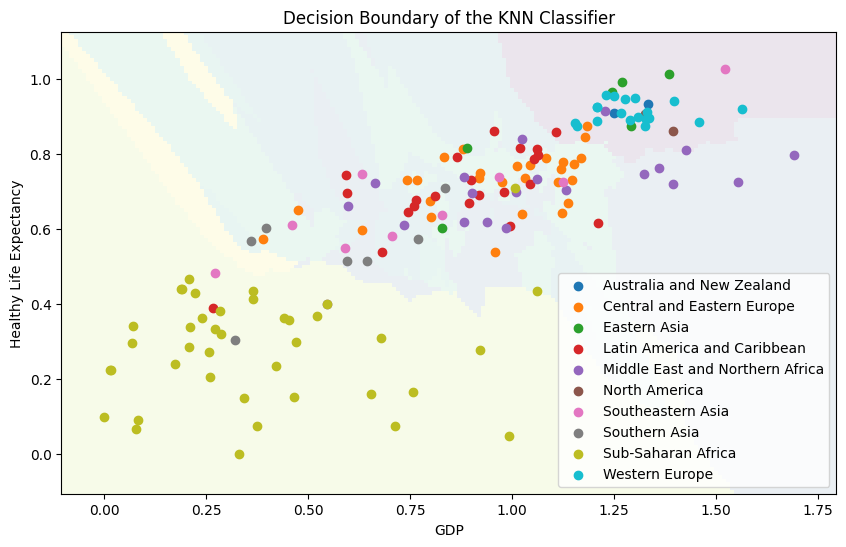

In [ ]:
labels = happy_df['Region'].unique()
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))
z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Region'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

###### **Solution**


It should be KNN, so this is the resulting plot.

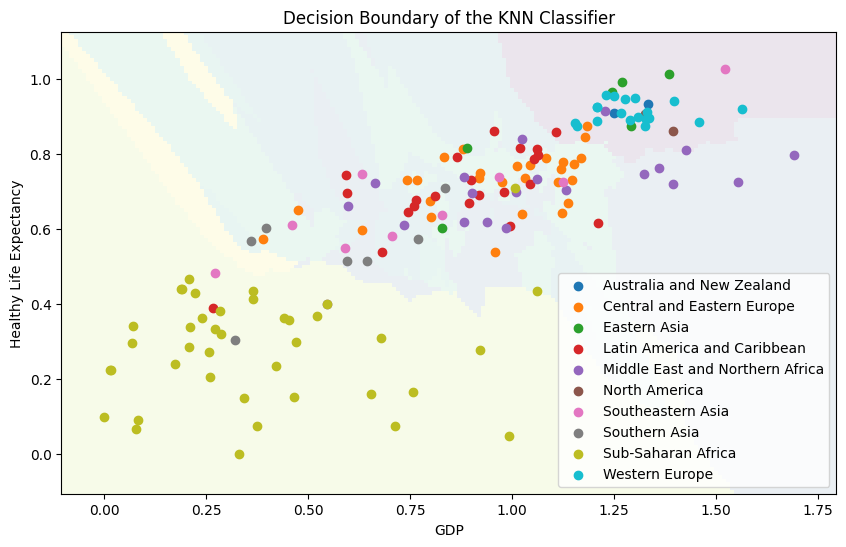

In [ ]:
labels = happy_df['Region'].unique()
feature_1_name = 'GDP'
feature_2_name = 'Healthy Life Expectancy'


# Make the same scatter plot of the training data
fig, ax = plt.subplots(figsize=(10,6))

xx, yy = np.meshgrid(np.arange(happy_df[feature_1_name].min() - 0.1, happy_df[feature_1_name].max() + 0.1, 0.01),
                     np.arange(happy_df[feature_2_name].min() - 0.1, happy_df[feature_2_name].max() + 0.1, 0.01))
z = model_2.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

ax.pcolormesh(xx, yy, z, alpha=0.1)

for label, data in happy_df.groupby('Region'):
  ax.scatter(data[feature_1_name], data[feature_2_name], label=label)

ax.set_title("Decision Boundary of the KNN Classifier")
ax.set_xlabel(feature_1_name)
ax.set_ylabel(feature_2_name)
ax.legend()
plt.show()

#### **Step #7: Evaluate the model’s performance**
---

To complete this step, you will need to recall or find out what evaluation metrics we typically use for whichever type of model you have trained.

<br>

If you used KNN, you should try several values for Steps #5 - 7 and pick the model that performs highest according to these metrics.

##### **Solution**

In [ ]:
print("Accuracy Score: " + str(accuracy_score(y_test, predictions)))

Accuracy Score: 0.65625


#### **Step #8: Use the model**
---

Specifically,

1. Predict the region of three countries that reported provided results for their numerical measures.

2. Visualize the modeled relationship between `Happinesss Score` and `Social Support` to see if a qualitative relationship can be inferred.

3. *If you used linear regression*, look at the coefficients and intercept to determine the modeled relationships quantitatively.

##### **1. Predict the region of these countries that reported the following results for their numerical measures:**

**Country 1**

* `Happiness Score`: 2.3
* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09

<br>

**Country 2**

* `Happiness Score`: 7.8
* `GDP`: 0.9
* `Social Support`: 0.4
* `Healthy Life Expectancy`: 0.8
* `Freedom`: 0.4
* `Corruption Perception`: 0.2
* `Generosity`: 0.09

<br>

**Country 3**

* `Happiness Score`: 4.5
* `GDP`: 1.1
* `Social Support`: 0.9
* `Healthy Life Expectancy`: 1.01
* `Freedom`: 0.9
* `Corruption Perception`: 1.1
* `Generosity`: 0.9

<br>

**NOTE**: Since we selected only the top 2 features, you will need to only provide these 2 values for each prediction. Looking at the columns in the X data could be helpful here.

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[# COMPLETE THIS LINE]], columns = X_test.columns)

region = model_2.predict(# COMPLETE THIS LINE
print(happy_df['Region'].unique()[region[0]])

In [ ]:
# COUNTRY 2
# COMPLETE THIS CODE

In [ ]:
# COUNTRY 3
# COMPLETE THIS CODE

###### **Solution**

In [ ]:
# COUNTRY 1
new_country = pd.DataFrame([[0.9, 0.8]], columns = X_test.columns)

region = model_2.predict(new_country)
print(happy_df['Region'].unique()[region[0]])

In [ ]:
# COUNTRY 2
new_country = pd.DataFrame([[0.9, 0.8]], columns = X_test.columns)

region = model_2.predict(new_country)
print(happy_df['Region'].unique()[region[0]])

In [ ]:
# COUNTRY 3
new_country = pd.DataFrame([[1.1, 1.01]], columns = X_test.columns)

region = model_2.predict(new_country)
print(happy_df['Region'].unique()[region[0]])

##### **2. Visualize the modeled relationship between `Region` and `Healthy Life Expectancy` to see if a qualitative relationship can be inferred.**

In [ ]:
# COMPLETE THIS CODE

plt.yticks(ticks = range(10), labels = happy_df['Region'].unique())

plt.show()

###### **Solution**

In [ ]:
plt.scatter(X_test["Healthy Life Expectancy"], predictions)

plt.title("Predicted Region vs. Healthy Life Expectancy")
plt.xlabel("Healthy Life Expectancy")
plt.ylabel("Region")

plt.yticks(ticks = range(10), labels = happy_df['Region'].unique())

plt.show()

##### **3. *If you used linear regression*, complete the cells below to look at the coefficients and intercept to determine the modeled relationships quantitatively.**

In [ ]:
coefficients = model_1.# COMPLETE THIS LINE
intercept = model_1.# COMPLETE THIS LINE

coefficients = pd.DataFrame([coefficients], columns = X_test.columns)
intercept = pd.DataFrame([intercept], columns = ["Happiness Score"])

In [ ]:
print("Coefficients:")
coefficients.head()

In [ ]:
print("\nIntercept:")
intercept.head()

###### **Solution**

This is a classification task, so this question is irrelevant.

<a name="p3w"></a>

---
### **Part 3: Wrapup**
---

Now that you have trained several models to accomplish this task, answer the following questions:

1. Is Linear Regression or KNN better suited to this task? Why?
2. Were there any hyperparameters you need to tune and, if so, what were the best values you found?
3. Did selecting a smaller number of features improve or decrease the performance of your model?
4. What 2 variables seem to play the largest role in determining `Region Encoded` based on your work in this part?

#### **Solution**

1. The label, `Region Encoded`, is a categorical variable. The task is to classify which region a data point belongs to, so this is a job for KNN. Technically, you could run linear regression since `Region Encoded` is numerical, but the results would not be particularly meaningful since the model could predict regions with decimal values, which have no real meaning.

2. Yes, we need to tune k (or `n_neighbors` in sklearn). When using all features, the $\sqrt{\text{size of data}} = \sqrt{124} \approx 11$ works quite well accomplishing an accuracy of 62.5%. When using just the top 2 features, k needed to be tuned down to 5 and then we could squeeze out a slightly higher performance with an accuracy of 65.625%.

3. Selecting a smaller number of features helped this model, so long as the hyperparameter, k, was tuned correctly. KNN is particularly susceptible to the curse of dimensionality, so it is often the case that feature selection helps. On a technical level, this is due to the fact that KNN relies on calculating and comparing distances, which effectively become less meaningful when working with more features.

4. Based on `SelectKBest(...)`, it seems `GDP` and `Healthy Life Expectancy` are the most important features. This is about as much as we can say at this point because, unlike with Linear Regression, KNN does not offer much insight into the *why* of the relationship-the inferences. So, it's hard to tell from the models themselves which variables are most important unless we were to try all possible combinations (there are $2^7 = 128$ of them since there are 7 features that can be included or not) and see if there's any noticeable patterns in the performance of all the models.

# Congratulations, you have completed your first full Machine Learning Project!

---
© 2023 The Coding School, All rights reserved